In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Make a synthetic classification dataset

In [3]:
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model

In [5]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Initialize and fit the random forest model

In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC for logistic regression

In [7]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Compute ROC curve and ROC AUC for random forest

In [15]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC AUC curves

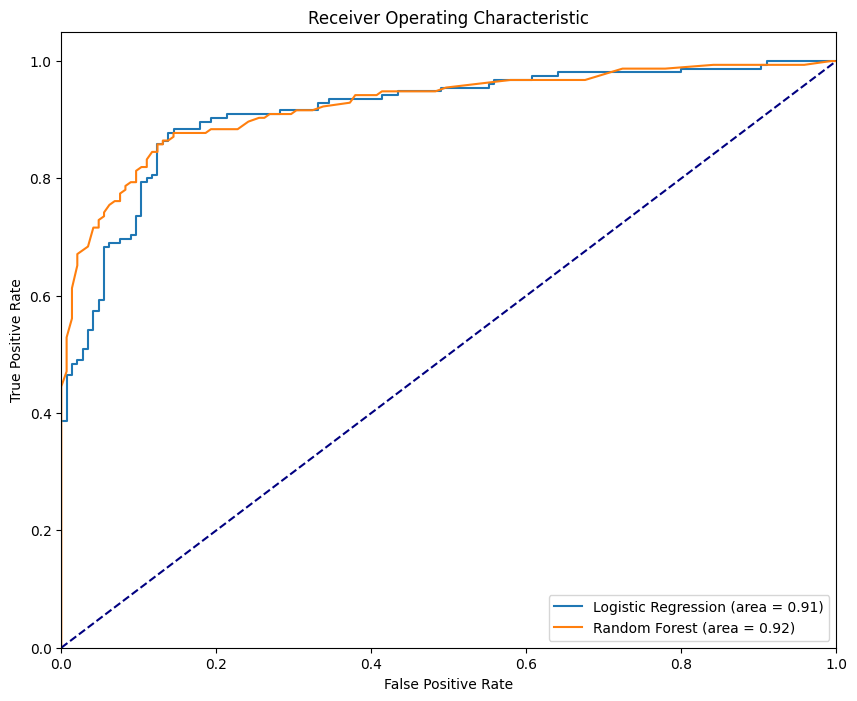

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (area = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict classes based on a threshold of 0.5

In [10]:
threshold = 0.5
y_pred_lr = (y_pred_prob_lr >= threshold).astype(int)
y_pred_rf = (y_pred_prob_rf >= threshold).astype(int)

# Compute and plot confusion matrix for logistic regression

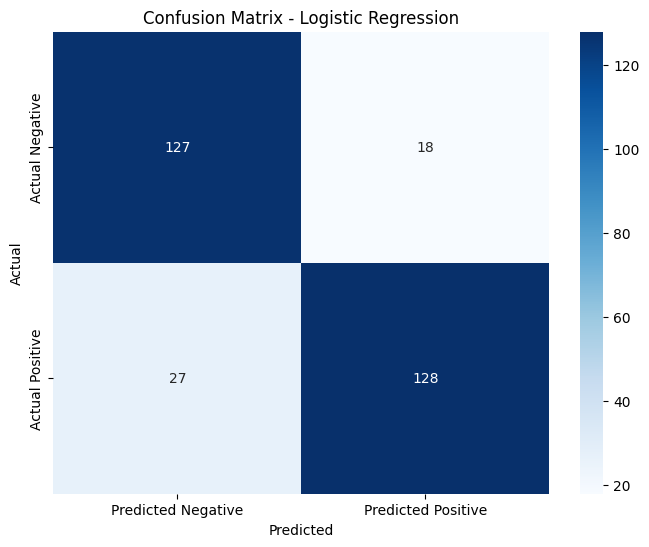

In [11]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Compute and plot confusion matrix for random forest

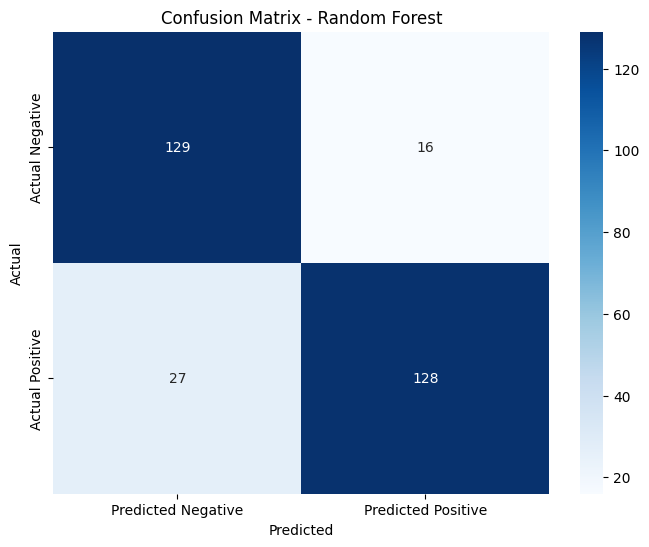

In [12]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Printing the AUC scores for comparison

In [13]:
print(f'Logistic Regression ROC AUC: {roc_auc_lr:.2f}')
print(f'Random Forest ROC AUC: {roc_auc_rf:.2f}')

Logistic Regression ROC AUC: 0.91
Random Forest ROC AUC: 0.92


# Choose the better model based on ROC AUC score

In [14]:
if roc_auc_lr > roc_auc_rf:
    print("Logistic Regression is the better model.")
else:
    print("Random Forest is the better model.")


Random Forest is the better model.
